In [19]:
from math import sqrt  
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rc("font", size=10)

from datetime import datetime
from openbb_terminal.sdk import openbb

In [20]:
#Now, use pandas to read an HTML table from Wikipedia.
#The table has a list of the Dow Jones stocks which we’ll use for the analysis.
#This code parses out the symbols and downloads price data using the OpenBB SDK.

In [21]:
SP=(pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0])
symbols=SP.Symbol.tolist()
symbols_string = ', '.join(f'"{symbol}"' for symbol in symbols)


In [22]:
print(symbols_string)

"MMM", "AOS", "ABT", "ABBV", "ACN", "ADM", "ADBE", "ADP", "AES", "AFL", "A", "ABNB", "APD", "AKAM", "ALK", "ALB", "ARE", "ALGN", "ALLE", "LNT", "ALL", "GOOGL", "GOOG", "MO", "AMZN", "AMCR", "AMD", "AEE", "AAL", "AEP", "AXP", "AIG", "AMT", "AWK", "AMP", "AME", "AMGN", "APH", "ADI", "ANSS", "AON", "APA", "AAPL", "AMAT", "APTV", "ACGL", "ANET", "AJG", "AIZ", "T", "ATO", "ADSK", "AZO", "AVB", "AVY", "AXON", "BKR", "BALL", "BAC", "BBWI", "BAX", "BDX", "WRB", "BRK.B", "BBY", "BIO", "TECH", "BIIB", "BLK", "BX", "BK", "BA", "BKNG", "BWA", "BXP", "BSX", "BMY", "AVGO", "BR", "BRO", "BF.B", "BG", "CHRW", "CDNS", "CZR", "CPT", "CPB", "COF", "CAH", "KMX", "CCL", "CARR", "CTLT", "CAT", "CBOE", "CBRE", "CDW", "CE", "COR", "CNC", "CNP", "CDAY", "CF", "CRL", "SCHW", "CHTR", "CVX", "CMG", "CB", "CHD", "CI", "CINF", "CTAS", "CSCO", "C", "CFG", "CLX", "CME", "CMS", "KO", "CTSH", "CL", "CMCSA", "CMA", "CAG", "COP", "ED", "STZ", "CEG", "COO", "CPRT", "GLW", "CTVA", "CSGP", "COST", "CTRA", "CCI", "CSX", "CMI

In [23]:
#Now, use the OpenBB SDK to download the price data for the symbols.
#We’ll use the adjusted close price for the analysis.

start_date = pd.to_datetime('2020-11-01')
end_date = pd.to_datetime('2023-11-01')

data = openbb.stocks.ca.hist(
    symbols,
    start_date=start_date,
    end_date=end_date
)

NaN values found in: ABNB, BRK.B, BF.B, CEG, GEHC, KVUE, VLTO.  Backfilling data

In [24]:
#compute the percent change to get the daily returns.
#Then use the pandas describe method to get a DataFrame of summary statistics.
#Transpose it and select the mean and standard deviation.
#Then rename the columns and annualize then.

In [35]:
moments= (
    data
    .pct_change()
    .describe()
    .T[['mean', 'std']]
    .rename(columns={'mean': 'returns', 'std': 'vol'})
)*[252, sqrt(252)]

print(moments)

       returns       vol
MMM  -0.124345  0.246268
AOS   0.158564  0.294331
ABT   0.002447  0.229384
ABBV  0.224799  0.213934
ACN   0.151857  0.260533
...        ...       ...
YUM   0.118767  0.199525
ZBRA -0.053600  0.390974
ZBH  -0.024725  0.267385
ZION  0.131363  0.491849
ZTS   0.017108  0.261138

[501 rows x 2 columns]


In [26]:
#The first step is to measure inertia.Inertia measures how well a dataset was clustered by KMeans.
#Using inertia, you can determine the optimal number of clusters, where adding another cluster doesn't significantly reduce the inertia

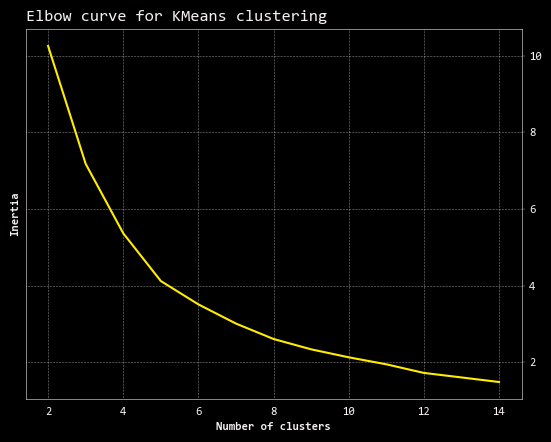

In [27]:
sse=[]
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(moments)
    sse.append(kmeans.inertia_)

#Plot the inertia for each k value to find the elbow point.

plt.plot(range(2, 15), sse)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for KMeans clustering')
plt.show()

In [28]:
#The result is a smooth, downward sloping chart.
#You can estimate where adding another cluster doesn’t significantly reduce the inertia.
#It looks like it’s around five or six.
#Next, build and plot the clusters.

In [29]:
#First, fit the model to the data using five clusters.Then plot the points and annotate each one with the ticker symbol and its cluster.

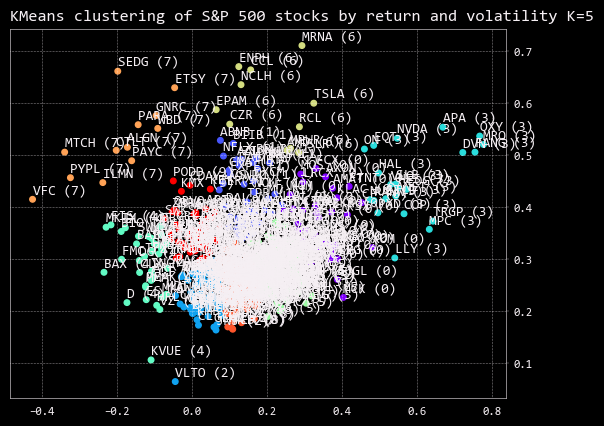

In [39]:
kmeans=KMeans(n_clusters=14, n_init=10).fit(moments)
plt.scatter(moments.returns, 
            moments.vol, 
            c=kmeans.labels_,
            cmap="rainbow",
    );

plt.title('KMeans clustering of S&P 500 stocks by return and volatility K=5')
for i in range(len(moments.index)):
    txt = f"{moments.index[i]} ({kmeans.labels_[i]})"
    xy=tuple(moments.iloc[i,:]+[0,0.01])
    plt.annotate(txt, xy=xy)

